In [1]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/marta/nltk_data...


True

In [1]:
import re
import ast
import time
import nltk
import joblib
import random
import codecs
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
from scipy import stats
from nltk import pos_tag
from random import shuffle
import plotly.express as px
import plotly.subplots as sp
from textblob import TextBlob
from nltk import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from wordcloud import STOPWORDS
from scipy.sparse import hstack
import plotly.graph_objects as go
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
from geopy.geocoders import Nominatim
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from datasketch import MinHash, MinHashLSHForest
from concurrent.futures import ThreadPoolExecutor
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, ParameterGrid
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, f1_score, auc,
                             precision_score, recall_score, roc_auc_score, roc_curve, 
                             precision_recall_curve)
from model_evaluation import *

from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier

import eval

In [3]:
df = pd.read_csv('data_analysis/cleaned_data.csv')
df[:5]

,bot,screen_name,created_at,hour_created,verified,geo_enabled,lang,default_profile,default_profile_image,favourites_count,...,avg_daily_favorites,friends_log,followers_log,favs_log,avg_daily_tweets_log,network,tweet_to_followers,follower_acq_rate,friends_acq_rate,favs_rate
0,1,paty_castroo,2009-07-04 22:41:51,22,0,0,NaN,0,0,5007,...,0.0,5.130,4.635,8.519,0.682,23.778,38.412,0.025,0.041,0.041
1,0,CBirckner,2010-01-17 22:54:19,22,0,0,en,0,0,1038,...,0.0,4.860,4.111,6.946,0.065,19.979,22.859,0.015,0.033,0.033
2,0,amf_jay,2012-03-01 06:05:32,6,0,1,NaN,0,0,2257,...,0.0,6.109,6.397,7.722,1.688,39.079,60.898,0.177,0.136,0.136
3,0,SaraCavolo,2009-09-01 04:52:30,4,0,1,NaN,0,0,6407,...,0.0,5.814,4.762,8.765,0.745,27.686,39.987,0.029,0.080,0.080
4,0,DavidHenaoModel,2010-01-27 17:17:23,17,1,1,es,0,0,20866,...,19.0,2.944,11.218,9.946,1.632,33.026,108.502,3.011,0.005,0.005


In [4]:
# features = df[['created_at',
#                'verified',
#                'geo_enabled',
#                'default_profile',
#                'default_profile_image',
#                'favourites_count',
#                'followers_count',
#                'friends_count',
#                'statuses_count',
#                'average_tweets_per_day',
#                'account_age_days',
#                'avg_daily_followers',
#                'avg_daily_friends',
#                'avg_daily_favorites',
#                'friends_log',
#                'followers_log',
#                'favs_log',
#                'avg_daily_tweets_log',
#                'network',
#                'tweet_to_followers',
#                'follower_acq_rate',
#                'friends_acq_rate',
#                'favs_rate']]

features = df[['hour_created',
               'verified',
               'default_profile',
               'favourites_count',
               'followers_count',
               'friends_count',
               'statuses_count',
               'average_tweets_per_day',
               'account_age_days',
               ]]

In [23]:
y = df['bot']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=99)

In [77]:
def normalize(df,df_train):
    result = df.copy()
    for feature_name in df_train.columns:
        max_value = df_train[feature_name].max()
        min_value = df_train[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

# Random Forest

In [84]:
ntrees = 75
max_depth=20
max_features='auto'

In [100]:
random_forest = RandomForestClassifier(n_estimators=50, criterion='gini', bootstrap=True, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [105]:
for i in range(30, 100, 5):
    random_forest = RandomForestClassifier(n_estimators=i, criterion='gini', bootstrap=True, random_state=42)
    random_forest.fit(X_train, y_train)
    print(i, random_forest.score(X_test, y_test))

30 0.8700142450142451
35 0.8701032763532763
40 0.8693019943019943
45 0.8697471509971509
50 0.8709045584045584
55 0.8709935897435898
60 0.8719729344729344
65 0.8717058404558404
70 0.8709045584045584
75 0.8714387464387464
80 0.8725961538461539
85 0.8722400284900285
90 0.8720619658119658
95 0.8725961538461539


In [101]:
random_forest_train_score = random_forest.score(X_train, y_train)
random_forest_test_score = random_forest.score(X_test, y_test)

print(f'Train score: {random_forest_train_score:.2f}')
print(f'Test score: {random_forest_test_score:.2f}')

Train score: 1.00
Test score: 0.87


In [102]:
y_pred = random_forest.predict(X_test)
results_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

In [103]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.87


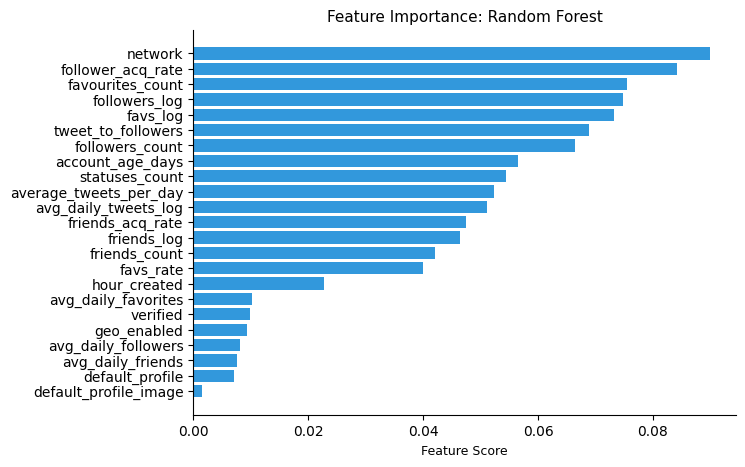

In [106]:
eval.plot_feature_importance(random_forest, features, 'Random Forest')

Classification Metrics Report
-----------------------------
Accuracy:  0.8709
Precision: 0.8489
Recall:    0.7473
F1 Score:  0.7949

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7473
           1       0.85      0.75      0.79      3759

    accuracy                           0.87     11232
   macro avg       0.86      0.84      0.85     11232
weighted avg       0.87      0.87      0.87     11232




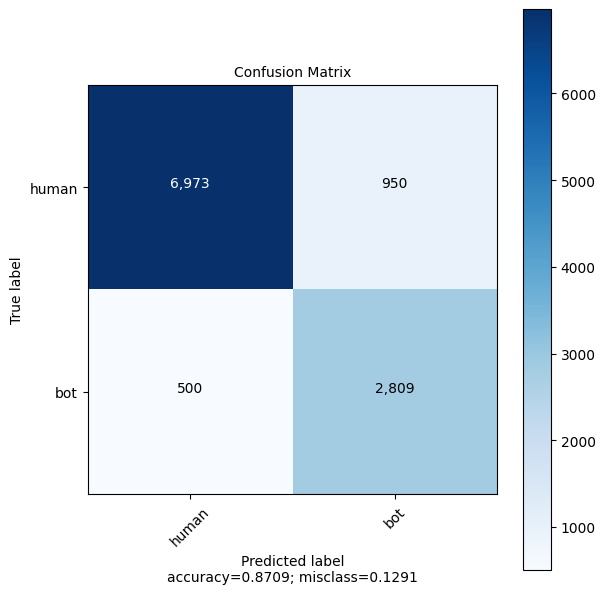

In [ ]:
eval.metrics_report(y_pred, y_test)

In [117]:
print(f"Stacking Classifier Accuracy: {random_forest.score(X_train, y_train) * 100}%")

Stacking Classifier Accuracy: 99.99618407998169%


# Multilayered Prediction

In [108]:
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=500))
]


In [109]:
meta_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [110]:
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5, verbose=1)

In [111]:
stacking_clf.fit(X_train, y_train)

/home/marta/ucu/ai/project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/marta/ucu/ai/project/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [03:24:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/marta/ucu/ai/project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterat

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(max_iter=1000)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importan...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('mlp', MLPClassifier(max_iter=500))],
                   final_estimator=RandomForestClassifier(random_state=42),
                   verbose=1)

In [112]:
y_pred = stacking_clf.predict(X_test)

In [114]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy: {stacking_clf.score(X_train, y_train) * 100}%")

Stacking Classifier Accuracy: 92.03235900175532%


Classification Metrics Report
-----------------------------
Accuracy:  0.8678
Precision: 0.7417
Recall:    0.8443
F1 Score:  0.7897

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      7930
           1       0.74      0.84      0.79      3302

    accuracy                           0.87     11232
   macro avg       0.84      0.86      0.85     11232
weighted avg       0.88      0.87      0.87     11232




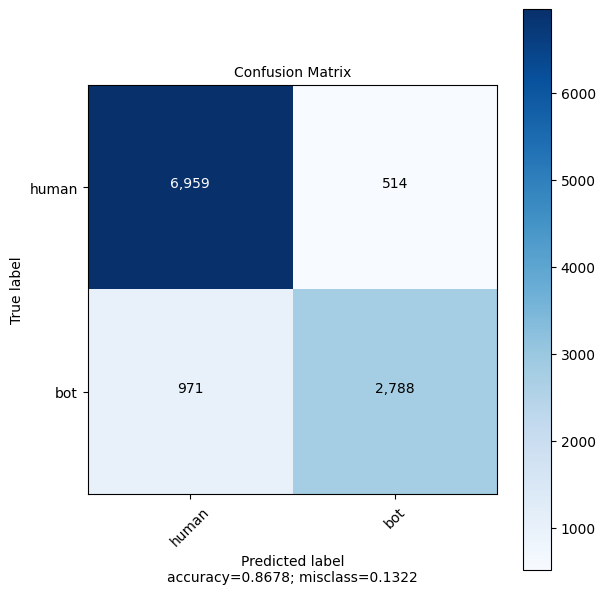

In [116]:
eval.metrics_report(y_test, y_pred)

# KNN

In [7]:
param_grid = {
    'n_neighbors': [x for x in range(3, 16)],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'n_jobs': [1, -1],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

In [8]:
grid = ParameterGrid(param_grid)
results = []

In [20]:
for i, params in enumerate(grid):
    knn = KNeighborsClassifier(n_neighbors = params['n_neighbors'],
                                weights = params['weights'],
                                algorithm = params['algorithm'],
                                n_jobs = params['n_jobs'],
                                metric = params['metric'])
    
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    
    results.append({
        'index' : i,
        'n_neighbors': params['n_neighbors'],
        'weights': params['weights'],
        'algorithm': params['algorithm'],
        'n_jobs': params['n_jobs'],
        'metric': params['metric'],
        'accuracy': acc
    })

In [21]:
results_df = pd.DataFrame(results)

In [22]:
best_params = results_df.loc[results_df['f1_score'].idxmax()]
print("Best Parameters:")
print(best_params)

Best Parameters:
index                119
n_neighbors           10
weights         distance
algorithm           auto
n_jobs                 1
metric         manhattan
f1_score        0.786192
accuracy             NaN
Name: 119, dtype: object


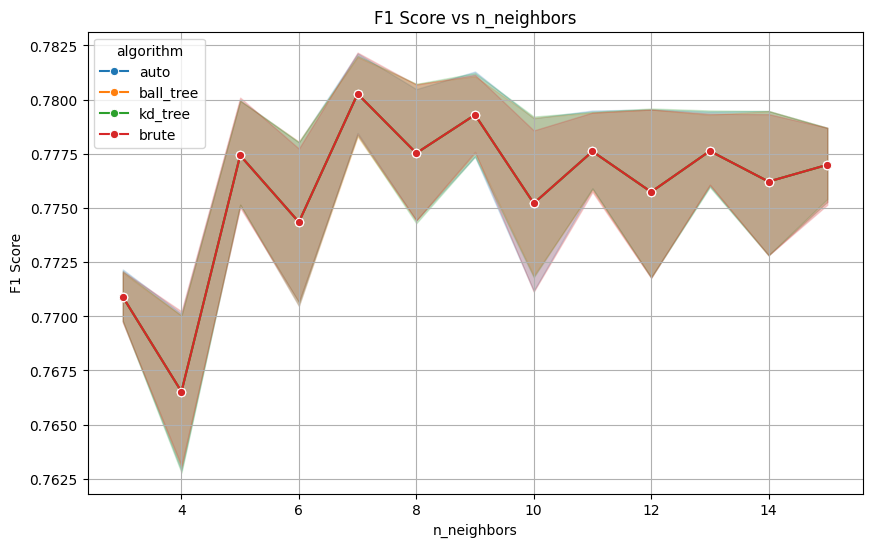

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=results_df,
    x='n_neighbors',
    y='f1_score',
    hue='algorithm',
    marker='o'
)
plt.title('F1 Score vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('F1 Score')
plt.legend(title='algorithm')
plt.grid()
# plt.xticks(rotation=45)  
plt.show()

In [17]:
best_model = KNeighborsClassifier(n_neighbors=10,
                                  weights='distance',
                                  algorithm = 'auto',
                                  n_jobs=1,
                                  metric='manhattan')

In [18]:
knn_pred = best_model.fit(X_train , y_train).predict(X_test)

Classification Metrics Report
-----------------------------
Accuracy:  0.8632
Precision: 0.7513
Recall:    0.8245
F1 Score:  0.7862

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      7807
           1       0.75      0.82      0.79      3425

    accuracy                           0.86     11232
   macro avg       0.84      0.85      0.84     11232
weighted avg       0.87      0.86      0.86     11232




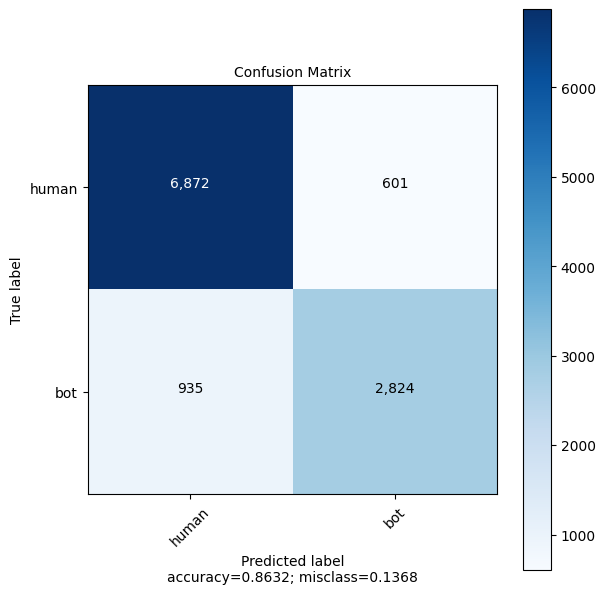

In [25]:
eval.metrics_report(y_test, knn_pred)

## Testing

In [26]:
twi_test = pd.read_csv('api/twitter_zelenskiy_data.csv')

twi_test['verified'] = twi_test['verified_blur'].astype(int)
twi_test.drop('verified_blur', axis=1, inplace=True)
twi_test['default_profile'] = twi_test['default_profile'].astype(int)
twi_test['default_profile_image'] = twi_test['default_profile_image'].astype(int)
twi_test['hour_created'] = pd.to_datetime(twi_test['created_at']).dt.hour

twi_test = twi_test[['hour_created',
               'verified',
               'default_profile',
               'favourites_count',
               'followers_count',
               'friends_count',
               'statuses_count',
               'average_tweets_per_day',
               'account_age_days',
               ]]

twi_pred = best_model.predict(twi_test)

twi_pred = ['bot' if pred == -1 else 'user' for pred in twi_pred]
twi_pred

['user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user',
 'user']

In [28]:
from joblib import Parallel, delayed 
import joblib 

In [29]:
joblib.dump(best_model, 'knn_bot_detector.pkl')

['knn_bot_detector.pkl']